[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


      id                                              title  \
0  20800  Specter of Trump Loosens Tongues, if Not Purse...   
1  20801  Russian warships ready to strike terrorists ne...   
2  20802  #NoDAPL: Native American Leaders Vow to Stay A...   
3  20803  Tim Tebow Will Attempt Another Comeback, This ...   
4  20804                    Keiser Report: Meme Wars (E995)   

                    author                                               text  
0         David Streitfeld  PALO ALTO, Calif.  —   After years of scorning...  
1                      NaN  Russian warships ready to strike terrorists ne...  
2            Common Dreams  Videos #NoDAPL: Native American Leaders Vow to...  
3            Daniel Victor  If at first you don’t succeed, try a different...  
4  Truth Broadcast Network  42 mins ago 1 Views 0 Comments 0 Likes 'For th...  
Palabras similares a 'news':
  searchlight: 0.7921243906021118
  press: 0.6555326581001282
  newsmax: 0.6308291554450989
  cnn: 0.59055709838

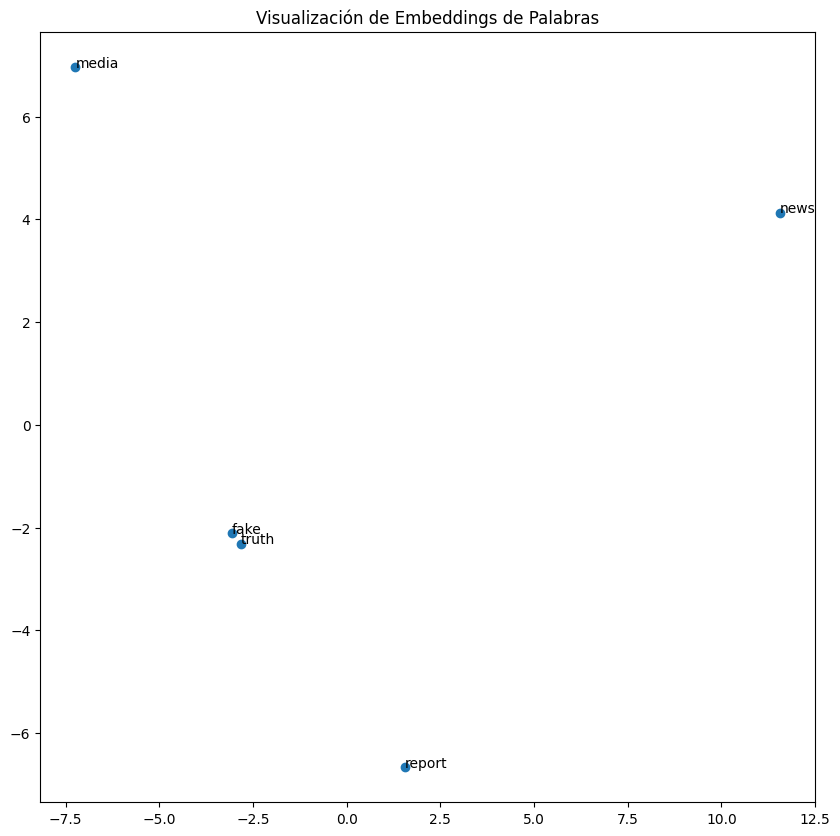


Conclusiones:
Al observar las palabras similares a términos de interés como 'news', 'fake', 'truth', 'report' y 'media', podemos ver que el modelo ha capturado relaciones semánticas relevantes. Por ejemplo, palabras similares a 'news' pueden incluir términos relacionados con la prensa y el periodismo. La gráfica de embeddings muestra cómo estas palabras se agrupan en el espacio de alta dimensionalidad, reflejando sus similitudes y diferencias.


In [1]:
# Importamos las librerías necesarias
import pandas as pd
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Descargar stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Cargar el dataset de Kaggle
# Supongamos que el dataset está guardado en un archivo CSV llamado 'test.csv'
data = pd.read_csv('test.csv')

# Mostrar las primeras filas del dataset
print(data.head())

# Preprocesar los datos
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# Aplicar preprocesamiento a la columna de texto del dataset, manejando NaN
data['processed_text'] = data['text'].fillna('').apply(preprocess_text)

# Entrenar el modelo Word2Vec
sentences = data['processed_text'].tolist()
model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

# Probar términos de interés y explicar similitudes en el espacio de embeddings
terms_of_interest = ['news', 'fake', 'truth', 'report', 'media']
for term in terms_of_interest:
    if term in model.wv:
        similar_words = model.wv.most_similar(term)
        print(f"Palabras similares a '{term}':")
        for word, similarity in similar_words:
            print(f"  {word}: {similarity}")
    else:
        print(f"La palabra '{term}' no está en el vocabulario del modelo.")

# Graficar los embeddings
def plot_embeddings(model, terms):
    words = []
    vectors = []
    for term in terms:
        if term in model.wv:
            words.append(term)
            vectors.append(model.wv[term])
    pca = PCA(n_components=2)
    result = pca.fit_transform(vectors)
    plt.figure(figsize=(10, 10))
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.title('Visualización de Embeddings de Palabras')
    plt.show()

# Graficar los términos de interés
plot_embeddings(model, terms_of_interest)

# Obtener conclusiones
print("\nConclusiones:")
print("Al observar las palabras similares a términos de interés como 'news', 'fake', 'truth', 'report' y 'media', podemos ver que el modelo ha capturado relaciones semánticas relevantes. Por ejemplo, palabras similares a 'news' pueden incluir términos relacionados con la prensa y el periodismo. La gráfica de embeddings muestra cómo estas palabras se agrupan en el espacio de alta dimensionalidad, reflejando sus similitudes y diferencias.")
